<a href="https://colab.research.google.com/github/Amir-Mojtahedi/OncoVision/blob/deploy-randomforestmodel/Random_Forest_Model_AI_Acc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

from scipy import stats
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from scipy.special import inv_boxcox

In [ ]:
#copy path
csv_url = '/content/drive/MyDrive/AI-Acc.Project/breast cancer dataset/breast-cancer.csv'
# Connect to you Google Drive
from google.colab import drive
drive.mount("/content/drive")

# Reading the CSV data from the specified URL into a DataFrame named 'df'
df = pd.read_csv(csv_url)

# 'df' now contains the data from the CSV file and is ready for further analysis
df



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
#Analysis

# View first 5 rows of the dataset

df.head()

# Generating descriptive statistics for the dataset
df.describe()

# Displaying concise summary of features in the dataset,
# including the number of non-null values and data types
df.info()

# Checking if there are any missing values (NaN) in the dataset and printing the result
print("\nAre there any missing points in the dataset?:", df.isnull().values.any())

df.isnull().sum()

# Counting the number of duplicated rows in the DataFrame and printing the result
print("Number of Duplicated Rows:", df.duplicated().sum())

# Displaying the dimensions (number of rows and columns) for the dataset
print("Dimensions of the Data:", df.shape)

# Display the first few rows of the dataset to understand its structure
print("First 5 rows of the dataset:")
print(df.head())

# Display the first few rows of the dataset to understand its structure
print("Last 5 rows of the dataset:")
print(df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

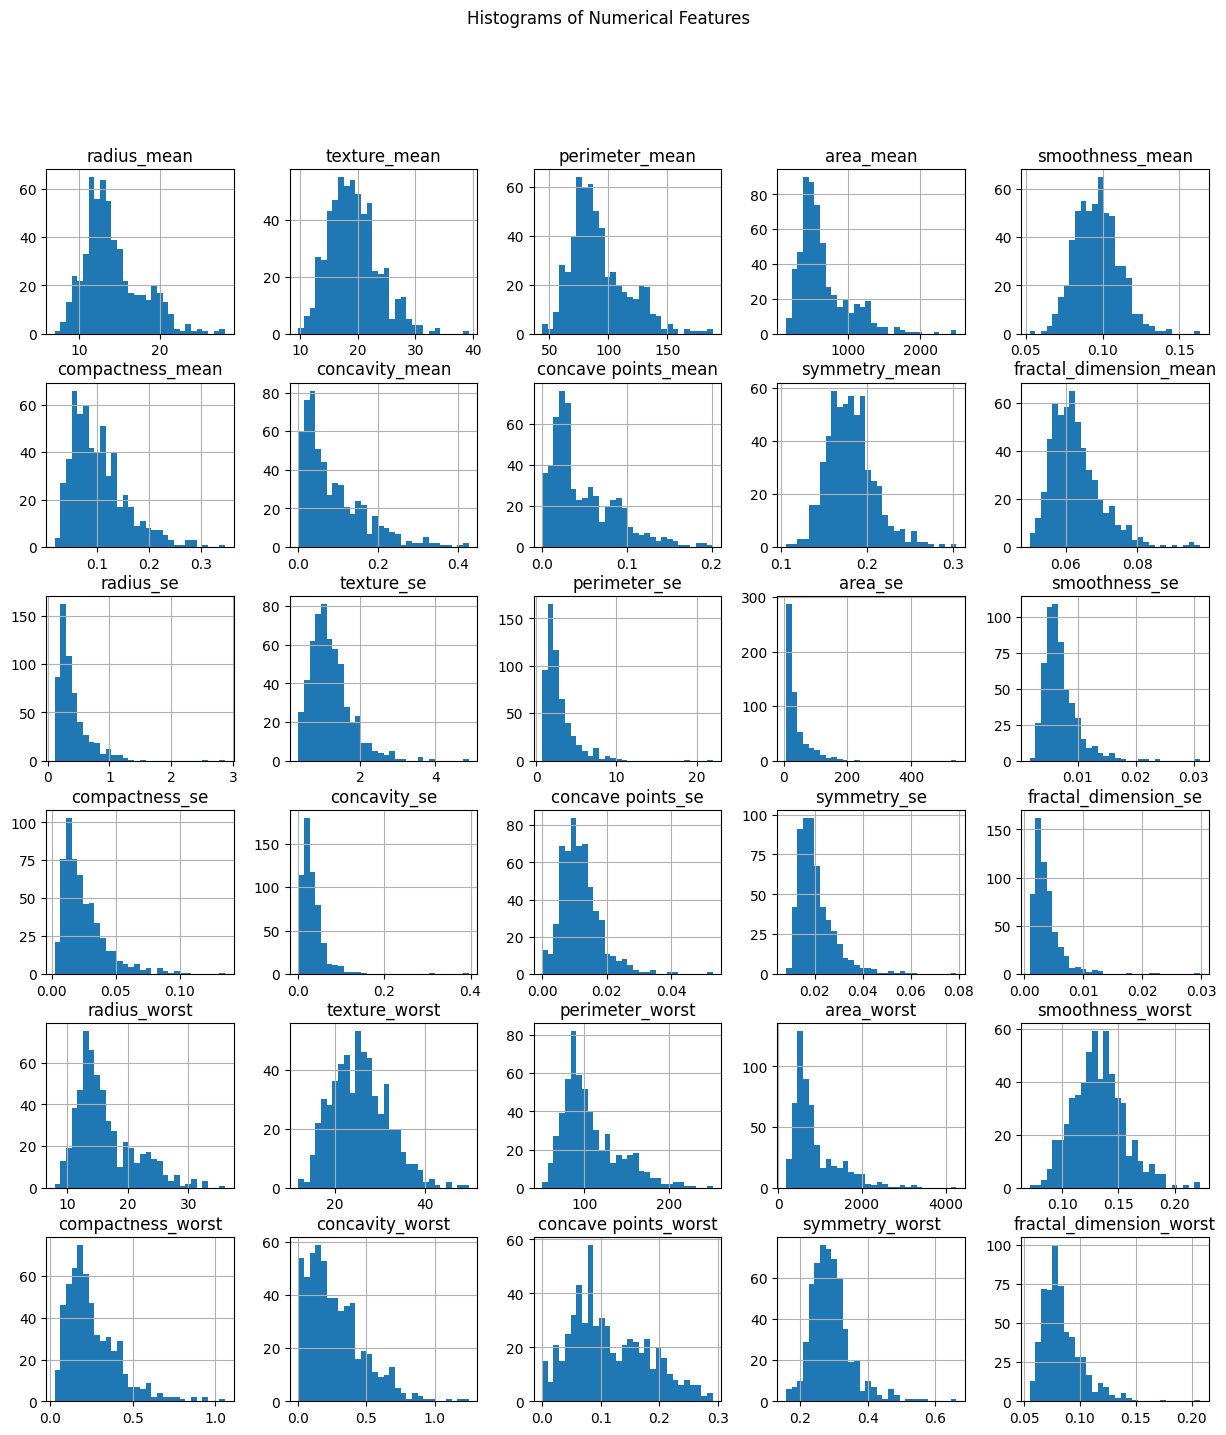

In [ ]:
# Visualize the distribution of numerical features
numerical_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
                      'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean',
                      'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se',
                      'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
                      'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
                      'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst',
                      'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
df[numerical_features].hist(bins=30, figsize=(15, 16))
plt.suptitle('Histograms of Numerical Features')
plt.show()

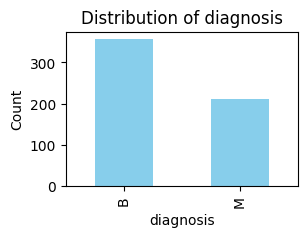

In [ ]:
# Visualize the distribution of categorical features
categorical_features = ['diagnosis']
for feature in categorical_features:
    plt.figure(figsize=(3, 2))
    df[feature].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

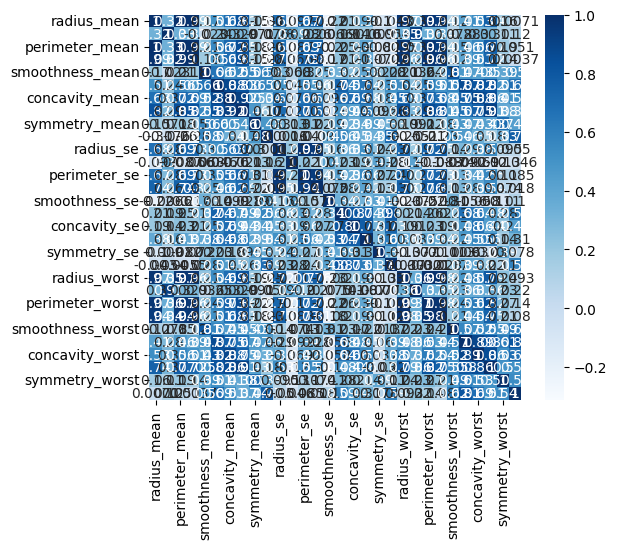

In [ ]:
# A higher (darker) value represents higher correlation between the variables
# A lower (lighter) value represents lower correlation between the variables
plt.figure(figsize=(6,5))
df_disp = df.drop(['id', 'diagnosis'], axis=1)
sns.heatmap(df_disp.corr(), cmap='Blues', annot=True);

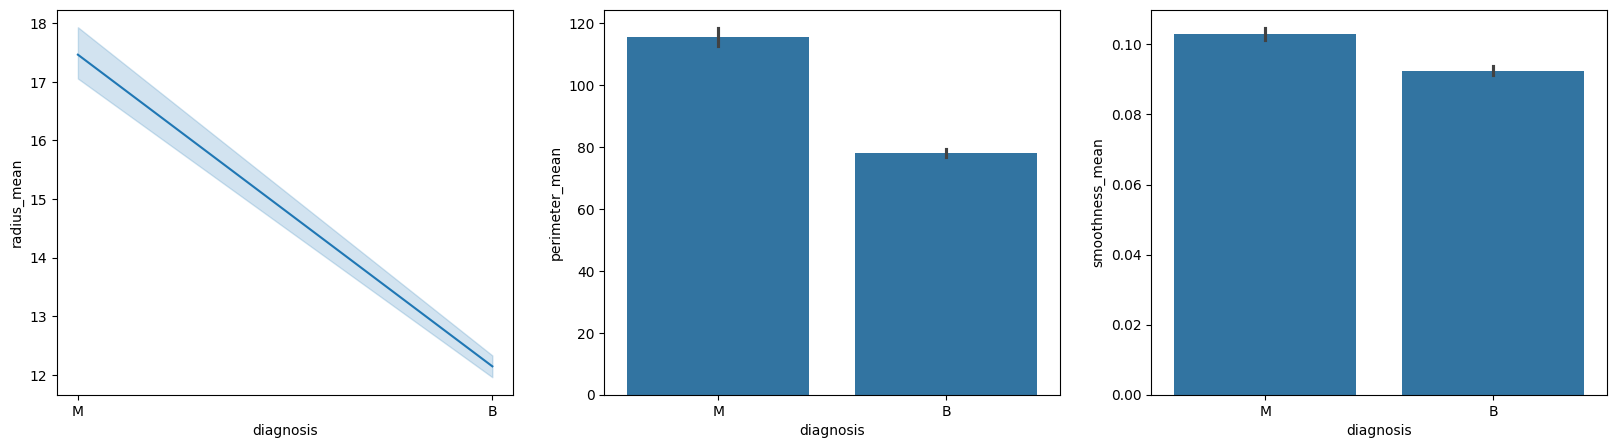

In [ ]:
# Create a figure with three subplots
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(20, 5))

# Plot diagnosis vs. radius_mean on the first subplot
sns.lineplot(x='diagnosis', y='radius_mean', data=df, ax=ax0)

# Plot diagnosis vs. perimeter_mean on the second subplot
sns.barplot(x='diagnosis', y='perimeter_mean', data=df, ax=ax1)

# Plot diagnosis vs. smoothness_mean on the third subplot
sns.barplot(x='diagnosis', y='smoothness_mean', data=df, ax=ax2)

# Display the plots
plt.show()

<ipython-input-11-00b67e706e02>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y='radius_mean', data=df, palette='Set3')


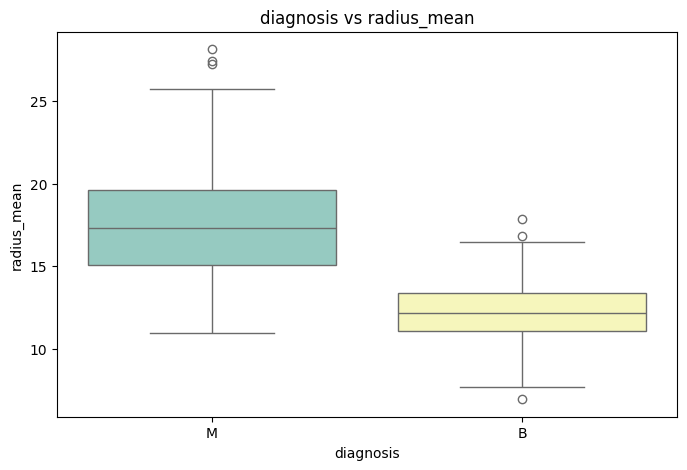

<ipython-input-11-00b67e706e02>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y='perimeter_mean', data=df, palette='viridis')


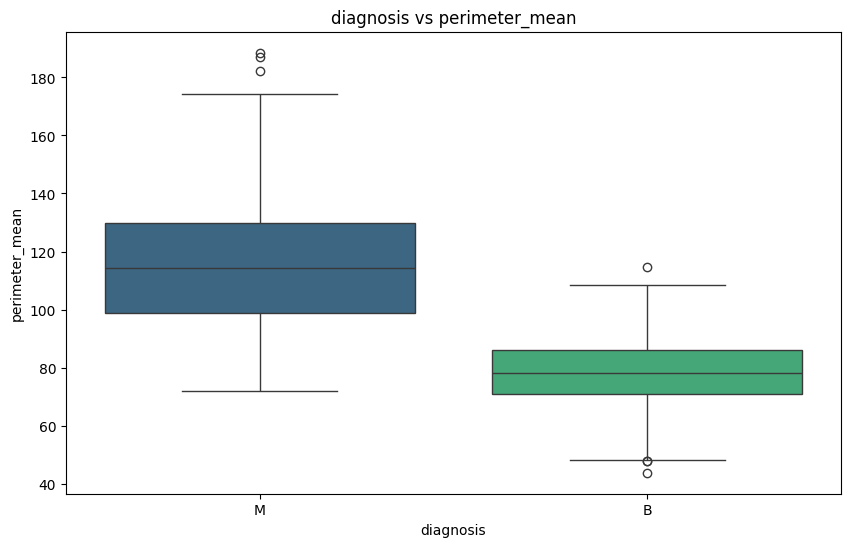

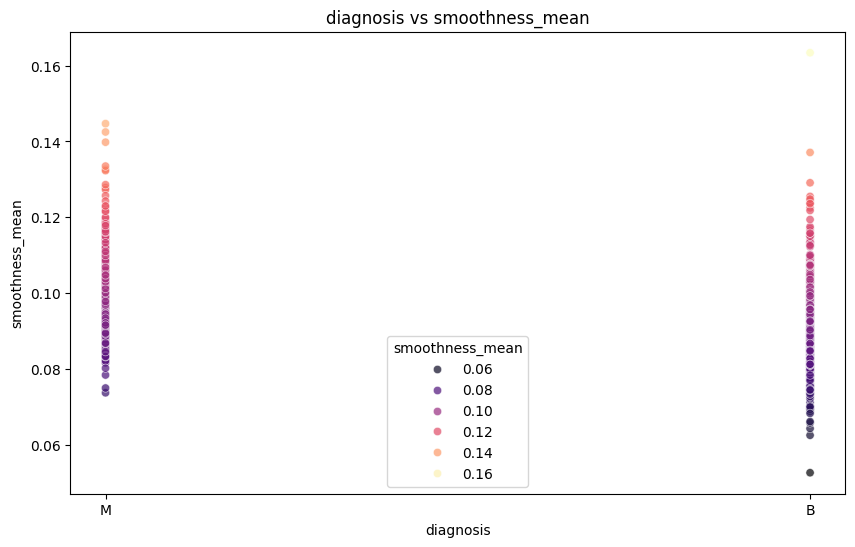

In [ ]:
# Visualize the distribution of diagnosis based on radius_mean
plt.figure(figsize=(8, 5))
sns.boxplot(x='diagnosis', y='radius_mean', data=df, palette='Set3')
plt.title('diagnosis vs radius_mean')
plt.show()

# Visualize the distribution of charges based on region
plt.figure(figsize=(10, 6))
sns.boxplot(x='diagnosis', y='perimeter_mean', data=df, palette='viridis')
plt.title('diagnosis vs perimeter_mean')
plt.show()

# Visualize the relationship of diagnosis and smoothness_mean
plt.figure(figsize=(10, 6))
sns.scatterplot(x='diagnosis', y='smoothness_mean', data=df, hue='smoothness_mean', palette='magma', alpha=0.7)
plt.title('diagnosis vs smoothness_mean')
plt.show()


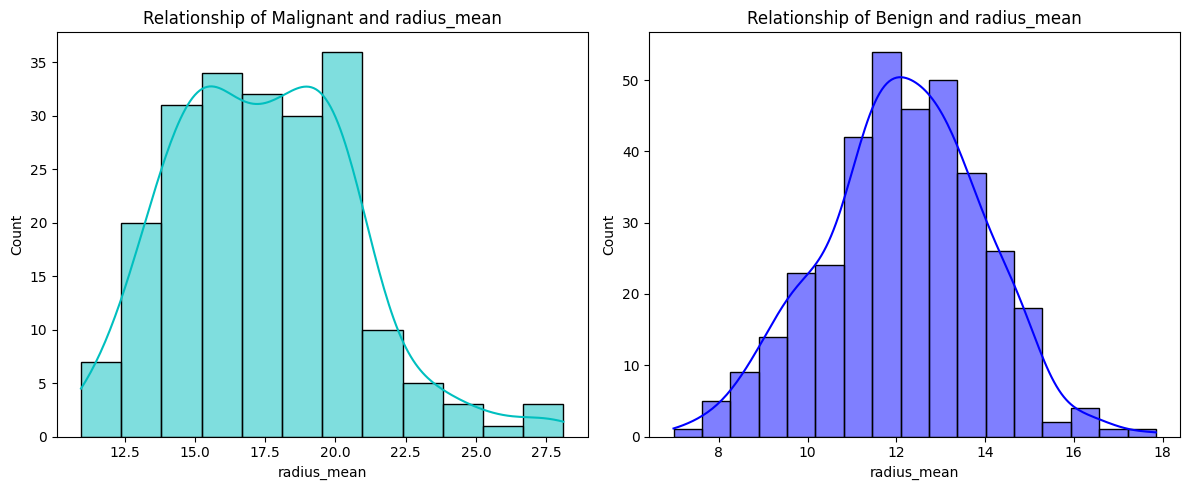

In [ ]:
f = plt.figure(figsize=(12, 5))

# First subplot for Malignant
ax1 = f.add_subplot(121)
sns.histplot(df[df.diagnosis == 'M']["radius_mean"], color='c', ax=ax1, kde=True)
ax1.set_title('Relationship of Malignant and radius_mean')

# Second subplot for Benign
ax2 = f.add_subplot(122)
sns.histplot(df[df.diagnosis == 'B']["radius_mean"], color='b', ax=ax2, kde=True)
ax2.set_title('Relationship of Benign and radius_mean')

plt.tight_layout()
plt.show()

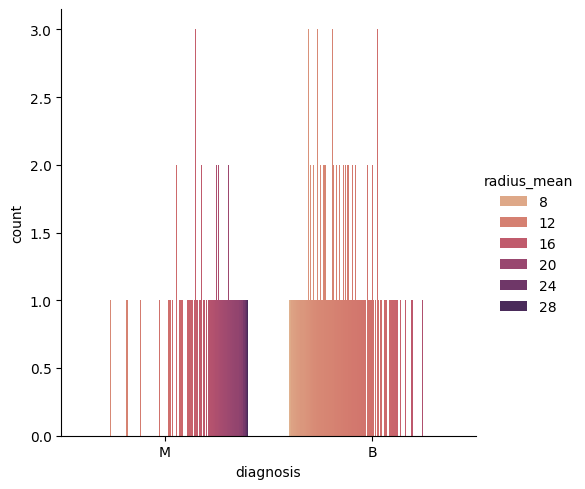

In [ ]:
sns.catplot(x="diagnosis", kind="count",hue = 'radius_mean', palette="flare", data=df)

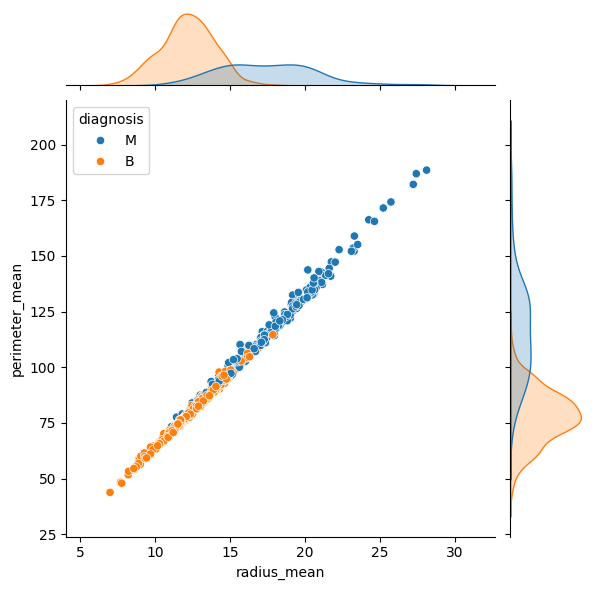

In [ ]:
sns.jointplot(data=df, x="radius_mean", y="perimeter_mean", hue="diagnosis")

In [ ]:
#Select and setup model

# Define the features (X) and target variable (y) for logistic regression
X = df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean','compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean',
                     'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se',
                      'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
                      'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
                      'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst',
                      'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']]
y = df['diagnosis']
X.head()

# Split the dataset into training and testing sets for logistic regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Instantiate a logistic regression model
logit_model = LogisticRegression(max_iter=500)

# Fit the logistic regression model using the training data
logit_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [ ]:
# Make predictions on the test set
y_pred = logit_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(y_true=y_test, y_pred=y_pred)*100)

Accuracy:  96.49122807017544


In [ ]:
# View a few samples of actual and predicted smoking status ##########################(0,1), (B,M)
num_samples_to_view = 5

for i in range(num_samples_to_view):
    print('===================================================')
    print(f'Test Sample #{i+1}')
    print()
    print(X_test.iloc[[i]])
    print()
    print(f'Actual Diagnosis Variable (0 for B, 1 for M): {y_test.iloc[i]}')
    print(f'Predicted Diagnosis Variable (0 for B, 1 for M): {y_pred[i]}')

    print()

Test Sample #1

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
512         13.4         20.52           88.64      556.7           0.1106   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
512            0.1469          0.1445              0.08172         0.2116   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
512                 0.07325  ...         16.41          29.66   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
512            113.3       844.4            0.1574             0.3856   

     concavity_worst  concave points_worst  symmetry_worst  \
512           0.5106                0.2051          0.3585   

     fractal_dimension_worst  
512                   0.1109  

[1 rows x 30 columns]

Actual Diagnosis Variable (0 for B, 1 for M): M
Predicted Diagnosis Variable (0 for B, 1 for M): M

Test Sample #2

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothne

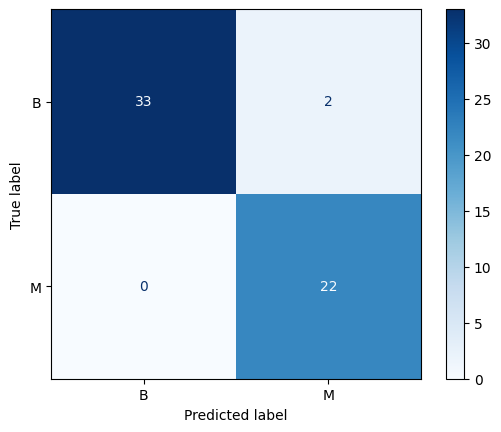

              precision    recall  f1-score   support

           B       1.00      0.94      0.97        35
           M       0.92      1.00      0.96        22

    accuracy                           0.96        57
   macro avg       0.96      0.97      0.96        57
weighted avg       0.97      0.96      0.97        57



In [ ]:
# Generate the Confusion Matrix for this logistic regression model
cm = metrics.confusion_matrix(y_test, y_pred, labels=logit_model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logit_model.classes_)
disp.plot(cmap='Blues')
plt.show();

print(metrics.classification_report(y_test, y_pred, target_names=['B', 'M']));